In [4]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [12]:
!unzip /content/drive/MyDrive/CNN/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/CNN/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [15]:
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(256, 256),
                                                class_mode='categorical', batch_size=32)

Found 4317 images belonging to 5 classes.


Creat Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [18]:
model = Sequential()

In [19]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(300, activation = "relu"))

In [23]:
model.add(Dense(300, activation = "relu"))

In [24]:
model.add(Dense(5,activation="softmax"))

In [26]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [27]:
len(a_flowers)

135

In [32]:
model.fit(a_flowers, epochs= 3,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

Epoch 1/3
135/135 [==============================] - 431s 3s/step - loss: 0.8492 - accuracy: 0.6810 - val_loss: 0.4804 - val_accuracy: 0.8668
Epoch 2/3
135/135 [==============================] - 432s 3s/step - loss: 0.4084 - accuracy: 0.8687 - val_loss: 0.1964 - val_accuracy: 0.9495
Epoch 3/3
135/135 [==============================] - 432s 3s/step - loss: 0.1570 - accuracy: 0.9562 - val_loss: 0.0729 - val_accuracy: 0.9849


In [34]:
model.save("flowers.h5")

In [ ]:
#Testing the Model

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [35]:
model = load_model("/content/drive/MyDrive/CNN/flowers.h5")

In [48]:
img = image.load_img("/content/drive/MyDrive/CNN/flowers/rose/10090824183_d02c613f10_m.jpg",target_size=(256,256))

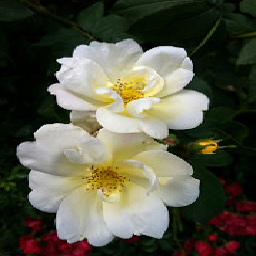

In [49]:
img

In [50]:
x = image.img_to_array(img)

In [51]:
x

array([[[ 6., 15.,  0.],
        [ 6., 15.,  0.],
        [ 6., 15.,  0.],
        ...,
        [32., 52., 25.],
        [32., 52., 25.],
        [33., 53., 26.]],

       [[14., 22.,  7.],
        [14., 22.,  7.],
        [14., 22.,  7.],
        ...,
        [33., 49., 23.],
        [33., 49., 23.],
        [35., 51., 25.]],

       [[15., 23., 12.],
        [15., 23., 12.],
        [15., 23., 12.],
        ...,
        [33., 45., 23.],
        [33., 45., 23.],
        [36., 48., 26.]],

       ...,

       [[27., 30., 19.],
        [18., 24., 14.],
        [18., 24., 14.],
        ...,
        [ 1.,  8.,  0.],
        [ 1.,  8.,  0.],
        [ 0.,  5.,  0.]],

       [[28., 30., 19.],
        [24., 27., 18.],
        [24., 27., 18.],
        ...,
        [ 2.,  9.,  1.],
        [ 2.,  9.,  1.],
        [ 2.,  7.,  0.]],

       [[19., 19.,  9.],
        [24., 25., 17.],
        [24., 25., 17.],
        ...,
        [ 3., 10.,  2.],
        [ 3., 10.,  2.],
        [ 4., 11.,  3.]]

In [52]:
x.ndim

3

In [53]:
x = np.expand_dims(x,axis= 0)

In [54]:
x.ndim

4

In [55]:
pred = model.predict(x)

In [56]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [57]:
hi = ["daisy","dandelion","rose","sunflower","tulip"]

In [58]:
np.argmax(pred)

2

In [59]:
hi[np.argmax(pred)]

'rose'